In [ ]:
### CODE 2
import pandas as pd
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
city_list = ['kyoto', 'liestal', 'nyc', 'vancouver', 'washingtondc']

In [ ]:
df_bloom_list = []
for city in city_list:
  file_path = f'/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/{city}.csv'
  df_bloom = pd.read_csv(file_path)
  lat_lon_alt = {
      "location": df_bloom['location'][0],
      "lat": df_bloom['lat'][0],
           "long": df_bloom['long'][0],
           "alt": df_bloom['alt'][0],
          }
  df_bloom_list.append(lat_lon_alt)

In [ ]:
lat_lon_alt_df = pd.DataFrame(df_bloom_list)

In [ ]:
lat_lon_alt_df

location        lat        long    alt
0         kyoto  35.011983  135.676114   44.0
1       liestal  47.481400    7.730519  350.0
2   newyorkcity  40.730400  -73.998090    8.5
3     vancouver  49.223700 -123.163600   24.0
4  washingtondc  38.885350  -77.038628    0.0

In [ ]:
df_bloom = pd.concat(df_bloom_list, ignore_index=True)

In [ ]:
df_bloom.to_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/bloom_combined.csv', index=False)

In [ ]:
(df_bloom.location == 'liestal').mean()

0.12186046511627907

In [ ]:
df_bloom.columns

Index(['location', 'lat', 'long', 'alt', 'year', 'bloom_date', 'bloom_doy'], dtype='object')

In [ ]:
file_path = '/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/final_weather.csv'
df_weather = pd.read_csv(file_path)

In [ ]:
df_weather["DATE"] = pd.to_datetime(df_weather["DATE"], errors="coerce")

In [ ]:
type(df_weather.iloc[0, 0])

str

In [ ]:
type(df_weather.iloc[152236, 0])

str

In [ ]:
# 填入正确路径
file_path = '/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/bloom_combined.csv'
df_bloom = pd.read_csv(file_path)

In [ ]:
df_bloom['location'].unique()

array(['kyoto', 'liestal', 'newyorkcity', 'vancouver', 'washingtondc'],
      dtype=object)

In [ ]:
file_path = '/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/final_weather.csv'
df_weather = pd.read_csv(file_path)

In [ ]:
df_weather

DATE      STATION       TMAX       TMIN  PRCP
0       1936-09-01 00:00:00  USW00013743  24.514026  15.969218   0.0
1       1936-09-02 00:00:00  USW00013743  24.514026  15.969218   0.0
2       1936-09-03 00:00:00  USW00013743  24.514026  15.969218   0.0
3       1936-09-04 00:00:00  USW00013743  24.514026  15.969218   0.0
4       1936-09-05 00:00:00  USW00013743  24.514026  15.969218   0.0
...                     ...          ...        ...        ...   ...
152232           2025-02-14  SZ000001940   6.611111   1.066667  89.0
152233           2025-02-15  SZ000001940   3.900000  -2.800000   0.0
152234           2025-02-16  SZ000001940   4.500000  -0.700000   0.0
152235           2025-02-17  SZ000001940   3.500000   0.700000   0.0
152236           2025-02-18  SZ000001940   3.900000  -0.600000   0.0

[152237 rows x 5 columns]

In [ ]:
df_bloom

location        lat        long   alt  year       DATE  bloom_doy  \
714          kyoto  35.011983  135.676114  44.0  1900 1900-04-12        102   
715          kyoto  35.011983  135.676114  44.0  1901 1901-04-12        102   
716          kyoto  35.011983  135.676114  44.0  1902 1902-04-08         98   
717          kyoto  35.011983  135.676114  44.0  1903 1903-04-09         99   
718          kyoto  35.011983  135.676114  44.0  1904 1904-04-17        108   
...            ...        ...         ...   ...   ...        ...        ...   
1070  washingtondc  38.885350  -77.038628   0.0  2020 2020-03-20         80   
1071  washingtondc  38.885350  -77.038628   0.0  2021 2021-03-28         87   
1072  washingtondc  38.885350  -77.038628   0.0  2022 2022-03-21         80   
1073  washingtondc  38.885350  -77.038628   0.0  2023 2023-03-23         82   
1074  washingtondc  38.885350  -77.038628   0.0  2024 2024-03-17         77   

          STATION  
714   JA000047759  
715   JA000047759  
716   JA000047759  
717   JA000047759  
718   JA000047759  
...           ...  
1070  USW00013743  
1071  USW00013743  
1072  USW00013743  
1073  USW00013743  
1074  USW00013743  

[355 rows x 8 columns]

In [ ]:
# 填入正确路径
file_path = '/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/bloom_combined.csv'
df_bloom = pd.read_csv(file_path)
df_bloom.rename(columns={'bloom_date': 'DATE'}, inplace=True)
df_bloom["DATE"] = pd.to_datetime(df_bloom["DATE"], errors="coerce")
df_bloom = df_bloom[~(df_bloom["DATE"].isna())]
df_bloom = df_bloom[df_bloom["DATE"] > '1900-01-01']
def add_station(x):
  if x == 'kyoto':
    return 'JA000047759'
  elif x == 'liestal':
    return 'SZ000001940'
  elif x == 'newyorkcity':
    return 'USW00014732'
  elif x == 'vancouver':
    return 'CA001108395'
  else:
    return 'USW00013743'
df_bloom['STATION'] = df_bloom['location'].apply(lambda x: add_station(x))

file_path = '/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/final_weather.csv'
df_weather = pd.read_csv(file_path)

# 计算均温
def calculate_tavg(x, y, eta):
  return eta * x + (1 - eta) * y

df_weather["TAVG"] = df_weather.apply(lambda x: calculate_tavg(x['TMAX'], x['TMIN'], 0.5), axis=1)

# 提取年份
# 处理 STATION 为 'SZ000001940' 的情况
mask_sz = df_weather["STATION"] == "SZ000001940"
df_weather.loc[mask_sz, "DATE"] = pd.to_datetime(df_weather.loc[mask_sz, "DATE"].str.strip(), format="%Y-%m-%d", errors="coerce")

# 处理其他 STATION（格式带有时间部分）
mask_other = ~mask_sz
df_weather.loc[mask_other, "DATE"] = pd.to_datetime(df_weather.loc[mask_other, "DATE"].str.strip(), format="%Y-%m-%d %H:%M:%S", errors="coerce")
# 统一转换日期
df_weather["DATE"] = pd.to_datetime(df_weather["DATE"], errors="coerce")
df_weather["year"] = df_weather["DATE"].dt.year

# 提取 DOY（一年中的第几天）
df_weather["DOY"] = df_weather["DATE"].dt.dayofyear

# 合并 bloom_doy 数据
df_weather = df_weather.merge(df_bloom[["year", "bloom_doy", 'STATION', 'location']], on=["year", 'STATION'], how="left")

# 定义四季的月份范围
seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

# 计算 Tmax 和 Tmin 的四季最大/最小值
seasonal_temps = []

df_weather["year"] = df_weather["DATE"].dt.year
df_weather["month"] = df_weather["DATE"].dt.month

for year in df_weather["year"].unique():
    season_data = {"year": year}

    for season, months in seasons.items():
        if season == "Winter":
            # 冬季：包含前年 12 月 + 当前年 1、2 月
            winter_data = df_weather[
                ((df_weather["year"] == year - 1) & (df_weather["month"] == 12)) |
                ((df_weather["year"] == year) & (df_weather["month"].isin([1, 2])))
            ]
        else:
            # 其他季节：仅当前年的该季节月份
            winter_data = df_weather[(df_weather["year"] == year - 1) & (df_weather["month"].isin(months))]

        if not winter_data.empty:
            season_data[f"Tmax_{season}"] = winter_data["TMAX"].max()
            season_data[f"Tmin_{season}"] = winter_data["TMIN"].min()
        else:
            season_data[f"Tmax_{season}"] = None
            season_data[f"Tmin_{season}"] = None

    seasonal_temps.append(season_data)

# 转换为 DataFrame 并合并
df_seasonal = pd.DataFrame(seasonal_temps)
df_weather = df_weather.merge(df_seasonal, on="year", how="left")

# 删除辅助列
df_weather.drop(columns=["month"], inplace=True)

# df_weather_2025 = df_weather[df_weather["year"] == 2025]
df_weather = df_weather[df_weather["year"] != 2025]

df_weather_avaliable = df_weather[df_weather["DOY"] <= df_weather["bloom_doy"]]

# 设定基础温度（通常为 5°C）
BASE_TEMP = 5

# 计算每日 GDD：如果 TAVG < BASE_TEMP，则为 0
# df_weather_avaliable["GDD"] = np.maximum(df_weather_avaliable["TAVG"] - BASE_TEMP, 0)
df_weather_avaliable["GDD"] = df_weather_avaliable["TAVG"] - BASE_TEMP

# 确保DOY升序排列
df_weather_avaliable = df_weather_avaliable.sort_values(by=["year", "DOY"]).reset_index(drop=True)

# 计算按年份累加的GDD和PRCP
df_weather_avaliable["GDD_cumsum"] = df_weather_avaliable.groupby("year")["GDD"].cumsum()
df_weather_avaliable["PRCP_cumsum"] = df_weather_avaliable.groupby("year")["PRCP"].cumsum()

# 计算积温相关特征
df_weather_avaliable["GDD_30d"] = df_weather_avaliable.groupby("year")["GDD"].transform(lambda x: x.rolling(30, min_periods=1).sum())
df_weather_avaliable["GDD_60d"] = df_weather_avaliable.groupby("year")["GDD"].transform(lambda x: x.rolling(60, min_periods=1).sum())
df_weather_avaliable["GDD_rate_change"] = df_weather_avaliable.groupby("year")["GDD_cumsum"].transform(lambda x: x.diff(periods=7))

# 计算温度趋势相关特征
df_weather_avaliable["TAVG_7d"] = df_weather_avaliable.groupby("year")["TAVG"].transform(lambda x: x.rolling(7, min_periods=1).mean())
df_weather_avaliable["TAVG_30d"] = df_weather_avaliable.groupby("year")["TAVG"].transform(lambda x: x.rolling(30, min_periods=1).mean())
df_weather_avaliable["TMAX_sudden_rise"] = df_weather_avaliable["TMAX"].diff(periods=7) > 10  # 过去 7 天 TMAX 是否升高超过 10°C
df_weather_avaliable["TMIN_sudden_drop"] = df_weather_avaliable["TMIN"].diff(periods=7) < -5  # 过去 7 天 TMIN 是否下降超过 5°C

# 计算降水相关特征
df_weather_avaliable["PRCP_7d_cumsum"] = df_weather_avaliable.groupby("year")["PRCP"].transform(lambda x: x.rolling(7, min_periods=1).sum())
df_weather_avaliable["PRCP_30d_cumsum"] = df_weather_avaliable.groupby("year")["PRCP"].transform(lambda x: x.rolling(30, min_periods=1).sum())
df_weather_avaliable["PRCP_dry_days"] = df_weather_avaliable.groupby("year")["PRCP"].transform(lambda x: (x == 0).astype(int).rolling(14, min_periods=1).sum())
df_weather_avaliable["PRCP_rainy_days"] = df_weather_avaliable.groupby("year")["PRCP"].transform(lambda x: (x > 0).astype(int).rolling(14, min_periods=1).sum())

# 计算极端天气事件相关特征
df_weather_avaliable["Frost_days_30d"] = df_weather_avaliable.groupby("year")["TMIN"].transform(lambda x: (x < 0).astype(int).rolling(30, min_periods=1).sum())
df_weather_avaliable["Heat_days_30d"] = df_weather_avaliable.groupby("year")["TMAX"].transform(lambda x: (x > 25).astype(int).rolling(30, min_periods=1).sum())
df_weather_avaliable["TMAX_fluctuation"] = df_weather_avaliable.groupby("year")["TMAX"].transform(lambda x: x.rolling(30, min_periods=1).std())

# 计算休眠状态相关特征
df_weather_avaliable["Chilling_Hours"] = df_weather_avaliable.groupby("year")["TAVG"].transform(lambda x: (x < 7).astype(int).rolling(60, min_periods=1).sum())
df_weather_avaliable["Dormancy_Release_Temp"] = df_weather_avaliable.groupby("year")["TAVG"].transform(lambda x: x.rolling(14, min_periods=1).mean())

def calculate_dormancy_release_date(df_weather, window=5):
    """
    计算每年的 Dormancy Release Date (DRD)：
    - 选择每年1月-3月的数据。
    - 找到气温(TAVG)从下降趋势转为上升的日期（局部最小点）。

    :param df_weather: 包含 'DATE', 'year', 'TAVG' 的 pandas DataFrame
    :return: DataFrame，包含 'year' 和对应的 'DRD' (DOY)
    """

    drd_list = []  # 存储每年的 DRD

    for year in df_weather["year"].unique():
        # 筛选该年的 1 月 - 3 月数据
        df_year = df_weather[(df_weather["year"] == year) & (df_weather["DOY"].between(40, 90))]

        if df_year.empty or df_year["TAVG"].isna().all():
            continue  # 跳过无数据的年份

        # 计算 TAVG 的滚动趋势 (7天窗口平滑)
        df_year["TAVG_rolling"] = df_year["TAVG"].rolling(window=window, min_periods=1, center=True).mean()

        # 找到“温度最低点后回升的第一个日期”（趋势逆转）
        for i in range(2, len(df_year) - 1):
            if (df_year["TAVG_rolling"].iloc[i] < df_year["TAVG_rolling"].iloc[i - 1]) and \
               (df_year["TAVG_rolling"].iloc[i] < df_year["TAVG_rolling"].iloc[i + 1]):
                drd_list.append({"year": year, "DRD": df_year["DOY"].iloc[i]})
                break  # 找到第一个趋势逆转点就停止

    # 转换为 DataFrame
    df_drd = pd.DataFrame(drd_list)

    return df_drd

# 计算 DRD 并合并到 bloom 数据
df_drd = calculate_dormancy_release_date(df_weather_avaliable)
df_weather_avaliable = df_weather_avaliable.merge(df_drd, on="year", how="left")

df_weather_avaliable = df_weather_avaliable.sort_values(by=['STATION', 'DATE'])
df_weather_avaliable.dropna(inplace=True)
df_weather_avaliable = df_weather_avaliable.merge(lat_lon_alt_df, on='location', how='left')

<ipython-input-268-d67aaff8b41f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_bloom["DATE"] = pd.to_datetime(df_bloom["DATE"], errors="coerce")
<ipython-input-268-d67aaff8b41f>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_avaliable["GDD"] = df_weather_avaliable["TAVG"] - BASE_TEMP
<ipython-input-268-d67aaff8b41f>:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [ ]:
df_weather_avaliable

DATE      STATION  TMAX  TMIN   PRCP  TAVG  year  DOY  bloom_doy  \
0     2022-01-03  CA001108395   5.4   1.6   76.0  3.50  2022    3       86.0   
1     2022-01-04  CA001108395   4.9   0.2   70.0  2.55  2022    4       86.0   
2     2022-01-05  CA001108395   0.8  -3.4    9.0 -1.30  2022    5       86.0   
3     2022-01-06  CA001108395   3.9  -3.5  164.0  0.20  2022    6       86.0   
4     2022-01-07  CA001108395   4.6   1.3   76.0  2.95  2022    7       86.0   
...          ...          ...   ...   ...    ...   ...   ...  ...        ...   
27098 2024-03-24  USW00014732   7.2   0.0    0.0  3.60  2024   84       88.0   
27099 2024-03-25  USW00014732  10.0   1.7    0.0  5.85  2024   85       88.0   
27100 2024-03-26  USW00014732  10.6   3.9    0.0  7.25  2024   86       88.0   
27101 2024-03-27  USW00014732  11.1   4.4   10.0  7.75  2024   87       88.0   
27102 2024-03-28  USW00014732   9.4   7.2  193.0  8.30  2024   88       88.0   

          location  ...  PRCP_rainy_days  Frost_days_30d  Heat_days_30d  \
0        vancouver  ...              5.0             2.0            0.0   
1        vancouver  ...              8.0             4.0            0.0   
2        vancouver  ...              8.0             6.0            0.0   
3        vancouver  ...              8.0             8.0            0.0   
4        vancouver  ...              8.0            10.0            0.0   
...            ...  ...              ...             ...            ...   
27098  newyorkcity  ...              8.0             2.0            0.0   
27099  newyorkcity  ...              7.0             2.0            0.0   
27100  newyorkcity  ...              6.0             2.0            0.0   
27101  newyorkcity  ...              7.0             2.0            0.0   
27102  newyorkcity  ...              7.0             2.0            0.0   

       TMAX_fluctuation  Chilling_Hours  Dormancy_Release_Temp  DRD      lat  \
0              5.920187             5.0               5.825926   40  49.2237   
1              5.169362             8.0               5.648993   40  49.2237   
2              5.857530            11.0               5.135969   40  49.2237   
3              5.458144            15.0               3.857398   40  49.2237   
4              5.114303            19.0               3.369898   40  49.2237   
...                 ...             ...                    ...  ...      ...   
27098          3.757248            16.0               6.833104   40  40.7304   
27099          3.735156            16.0               7.169643   40  40.7304   
27100          3.673313            15.0               6.757751   40  40.7304   
27101          3.031984            14.0               7.584125   40  40.7304   
27102          3.027440            14.0               7.523411   40  40.7304   

            long   alt  
0     -123.16360  24.0  
1     -123.16360  24.0  
2     -123.16360  24.0  
3     -123.16360  24.0  
4     -123.16360  24.0  
...          ...   ...  
27098  -73.99809   8.5  
27099  -73.99809   8.5  
27100  -73.99809   8.5  
27101  -73.99809   8.5  
27102  -73.99809   8.5  

[27103 rows x 41 columns]

In [ ]:
df_weather_avaliable.to_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/Fina_data.csv', index=False)

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

def add_noise(df, noise_level=0.02, num_augmented=2):
    """
    给数值特征添加随机噪声进行数据增强
    :param df: 原始数据集
    :param noise_level: 噪声水平 (默认 2%)
    :param num_augmented: 每条数据增强的数量
    :return: 增强后的数据集
    """
    augmented_samples = []
    numeric_features = [
        "TMAX", "TMIN", "PRCP", 'Tmax_Winter', 'Tmin_Winter', 'Tmax_Spring',
        'Tmin_Spring', 'Tmax_Summer', 'Tmin_Summer', 'Tmax_Fall', 'Tmin_Fall',
        "GDD_cumsum", "GDD_30d", "GDD_60d", "GDD_rate_change",
        "TAVG_7d", "TAVG_30d", "TMAX_sudden_rise", "TMIN_sudden_drop",
        "PRCP_cumsum", "PRCP_7d_cumsum", "PRCP_30d_cumsum", "PRCP_dry_days",
        "PRCP_rainy_days", "Frost_days_30d", "Heat_days_30d", "TMAX_fluctuation",
        "Chilling_Hours", "Dormancy_Release_Temp", "DRD"
    ]

    for i in range(num_augmented):
        noise = np.random.normal(loc=0, scale=noise_level, size=(df.shape[0], len(numeric_features)))
        df_noisy = df.copy()
        df_noisy[numeric_features] = df_noisy[numeric_features] + noise
        augmented_samples.append(df_noisy)

    return pd.concat([df] + augmented_samples, ignore_index=True)

def mixup_augmentation(df, alpha=0.2, num_augmented=2):
    """
    Mixup 数据增强: 随机混合两个样本
    """
    augmented_samples = []

    # 选出可以进行 Mixup 的数值特征
    exclude_columns = ["DATE", "STATION", "bloom_doy"]  # 这些列不进行 Mixup
    numerical_features = [col for col in df.columns if col not in exclude_columns and not col.startswith("loc_")]

    for _ in range(num_augmented):
        df_mix = df.copy()
        index_pairs = np.random.randint(0, len(df), size=(len(df), 2))
        lambda_ = np.random.beta(alpha, alpha, size=len(df))

        # 仅对数值特征进行 Mixup
        df_mix.loc[:, numerical_features] = (
            lambda_[:, None] * df.loc[index_pairs[:, 0], numerical_features].values +
            (1 - lambda_)[:, None] * df.loc[index_pairs[:, 1], numerical_features].values
        )

        augmented_samples.append(df_mix)

    return pd.concat([df] + augmented_samples, ignore_index=True)

In [ ]:
df_weather_avaliable.columns

Index(['DATE', 'STATION', 'TMAX', 'TMIN', 'PRCP', 'TAVG', 'year', 'DOY',
       'bloom_doy', 'location', 'Tmax_Winter', 'Tmin_Winter', 'Tmax_Spring',
       'Tmin_Spring', 'Tmax_Summer', 'Tmin_Summer', 'Tmax_Fall', 'Tmin_Fall',
       'GDD', 'GDD_cumsum', 'PRCP_cumsum', 'GDD_30d', 'GDD_60d',
       'GDD_rate_change', 'TAVG_7d', 'TAVG_30d', 'TMAX_sudden_rise',
       'TMIN_sudden_drop', 'PRCP_7d_cumsum', 'PRCP_30d_cumsum',
       'PRCP_dry_days', 'PRCP_rainy_days', 'Frost_days_30d', 'Heat_days_30d',
       'TMAX_fluctuation', 'Chilling_Hours', 'Dormancy_Release_Temp', 'DRD',
       'lat', 'long', 'alt'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# 选择用于机器学习的特征
FEATURES = [
    'Tmax_Winter', 'Tmin_Winter', 'Tmax_Spring',
    'Tmin_Spring', 'Tmax_Summer', 'Tmin_Summer', 'Tmax_Fall', 'Tmin_Fall',
    "GDD_cumsum", "GDD_30d", "GDD_60d", "GDD_rate_change",
    "TAVG_7d", "TAVG_30d", "TMAX_sudden_rise", "TMIN_sudden_drop",
    "PRCP_cumsum", "PRCP_7d_cumsum", "PRCP_30d_cumsum", "PRCP_dry_days",
    "PRCP_rainy_days", "Frost_days_30d", "Heat_days_30d", "TMAX_fluctuation",
    "Chilling_Hours", "Dormancy_Release_Temp", "DRD", 'lat', 'long', 'alt'
]

#
TARGET = "bloom_doy"

# 只保留开花当天的数据（bloom_doy 对应的 DOY）
df_final = df_weather_avaliable[df_weather_avaliable["DOY"] == df_weather_avaliable["bloom_doy"]]

# 准备数据
# X = df_final[FEATURES]
# y = df_final[TARGET]

# # 复制数据（避免修改原始数据）
# X_scaled = StandardScaler().fit_transform(X)  # 给 线性模型/SVM/神经网络用

# 划分训练集、测试集 (80% 训练, 20% 测试)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)
# X_train_tree, X_temp_tree, y_train_tree, y_temp_tree = train_test_split(X_tree, y, test_size=0.4, random_state=42)

In [ ]:
df_final

DATE      STATION  TMAX  TMIN   PRCP   TAVG  year  DOY  bloom_doy  \
83    2022-03-27  CA001108395  12.1   7.8   20.0   9.95  2022   86       86.0   
177   2023-04-06  CA001108395  10.9   6.7   99.0   8.80  2023   96       96.0   
257   2024-03-23  CA001108395   9.9   6.9   90.0   8.40  2024   83       83.0   
352   1951-04-08  JA000047759  21.3  10.3    0.0  15.80  1951   98       98.0   
454   1952-04-14  JA000047759  14.1  11.6   42.0  12.85  1952  105      105.0   
...          ...          ...   ...   ...    ...    ...   ...  ...        ...   
26781 2021-03-28  USW00013743  23.3  10.0  135.0  16.65  2021   87       87.0   
26859 2022-03-21  USW00013743  21.7   6.7    0.0  14.20  2022   80       80.0   
26939 2023-03-23  USW00013743  28.9  10.0    0.0  19.45  2023   82       82.0   
27015 2024-03-17  USW00013743  22.8  10.0    0.0  16.40  2024   77       77.0   
27102 2024-03-28  USW00014732   9.4   7.2  193.0   8.30  2024   88       88.0   

           location  ...  PRCP_rainy_days  Frost_days_30d  Heat_days_30d  \
83        vancouver  ...              5.0             0.0            0.0   
177       vancouver  ...              4.0             0.0            2.0   
257       vancouver  ...              6.0             2.0            0.0   
352           kyoto  ...              7.0             5.0            0.0   
454           kyoto  ...              4.0             5.0            1.0   
...             ...  ...              ...             ...            ...   
26781  washingtondc  ...              4.0             6.0            1.0   
26859  washingtondc  ...              5.0             0.0            0.0   
26939  washingtondc  ...              3.0             4.0            2.0   
27015  washingtondc  ...              4.0             0.0            0.0   
27102   newyorkcity  ...              7.0             2.0            0.0   

       TMAX_fluctuation  Chilling_Hours  Dormancy_Release_Temp  DRD  \
83             4.358720             8.0               9.697188   40   
177            5.439691            22.0               7.947998   40   
257            4.152003            14.0               7.199176   40   
352            4.061080            21.0              10.878571   40   
454            5.367357            17.0              14.521429   41   
...                 ...             ...                    ...  ...   
26781          5.839954            16.0              12.749745   42   
26859          5.092150            18.0              10.751276   40   
26939          4.850545            20.0              11.301452   40   
27015          4.901772            15.0              12.223465   40   
27102          3.027440            14.0               7.523411   40   

             lat        long   alt  
83     49.223700 -123.163600  24.0  
177    49.223700 -123.163600  24.0  
257    49.223700 -123.163600  24.0  
352    35.011983  135.676114  44.0  
454    35.011983  135.676114  44.0  
...          ...         ...   ...  
26781  38.885350  -77.038628   0.0  
26859  38.885350  -77.038628   0.0  
26939  38.885350  -77.038628   0.0  
27015  38.885350  -77.038628   0.0  
27102  40.730400  -73.998090   8.5  

[288 rows x 41 columns]

In [ ]:
# 先划分训练集 & 测试集（保证测试集不被修改）
X_train, X_test, y_train, y_test = train_test_split(df_final[FEATURES], df_final[TARGET], test_size=0.2, random_state=333)

# **对训练集进行数据增强**
X_train_augmented = add_noise(X_train, noise_level=0.02, num_augmented=2)  # 添加噪声
X_train_augmented = mixup_augmentation(X_train_augmented, alpha=0.2, num_augmented=2)  # Mixup

# **合并原始训练集和增强数据**
X_train_final = pd.concat([X_train, X_train_augmented], ignore_index=True)
y_train_final = pd.concat([y_train] * 5, ignore_index=True)  # 由于数据增强了4倍，所以y_train也要对应扩展

# **对训练集进行标准化**
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# **对测试集仅转换，不拟合（保持原始分布）**
X_test = scaler.transform(X_test)

In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 初始化多种模型
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    # "Generalized Additive Model (GAM)": LinearGAM(),
}

# 定义更精细的超参数范围
param_grids = {
    "Ridge Regression": {"alpha": np.logspace(-3, 3, 1000)},  # 0.001 to 1000 {"alpha": [1]},#
    "Lasso Regression": {"alpha": np.logspace(-6, 2, 1000)},
    "ElasticNet": {
        "alpha": np.logspace(-6, 3, 1000),
        "l1_ratio": np.arange(0.1, 1.0, 0.2)  # 0.1 to 0.9 step 0.1
    },
}

# 训练和超参数优化
results = {}
best_models = {}

for name, model in models.items():
    print(f"Training {name}...")

    # 网格搜索超参数（如果适用）
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model.fit(X_train, y_train)
        best_params = "Default"
    # 预测 & 评估
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R²": r2, "Best Params": best_params}
    best_models[name] = best_model

# 显示结果
df_results = pd.DataFrame(results).T

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet...


In [ ]:
df_results

MSE        R²  \
Linear Regression  68.141208  0.279622   
Ridge Regression    61.52616  0.349556   
Lasso Regression   63.524538  0.328429   
ElasticNet         63.252378  0.331306   

                                                         Best Params  
Linear Regression                                            Default  
Ridge Regression                        {'alpha': 56.33142670601352}  
Lasso Regression                      {'alpha': 0.30024617090855493}  
ElasticNet         {'alpha': 0.31952475057592133, 'l1_ratio': 0.9...

In [ ]:
year = 2024

# 选择 2025 年的最新气象数据
df_test = df_weather[df_weather["year"] == year]

# 设定基础温度（通常为 5°C）
BASE_TEMP = 5

# 计算每日 GDD：如果 TAVG < BASE_TEMP，则为 0
df_test["GDD"] = np.maximum(df_test["TAVG"] - BASE_TEMP, 0)

# 计算 2025 年 GDD_cumsum
df_test["GDD_cumsum"] = df_test["GDD"].cumsum()

df_test["PRCP_cumsum"] = df_test["PRCP"].cumsum()

# 取最后一天的气象数据
latest_data = df_test.iloc[-1][FEATURES].values.reshape(1, -1)

# 标准化
latest_data_scaled = scaler.transform(latest_data)

# 预测
best_model = models["Decision Tree"]  # 可以换成 R² 最高的模型
predicted_bloom_doy = best_model.predict(latest_data_scaled)[0]

print(f"🔮 预测 {year} 年的樱花开花日期 (DOY): {int(predicted_bloom_doy)}")

🔮 预测 2024 年的樱花开花日期 (DOY): 98


<ipython-input-176-fc86843046a8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["GDD"] = np.maximum(df_test["TAVG"] - BASE_TEMP, 0)
<ipython-input-176-fc86843046a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["GDD_cumsum"] = df_test["GDD"].cumsum()
<ipython-input-176-fc86843046a8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

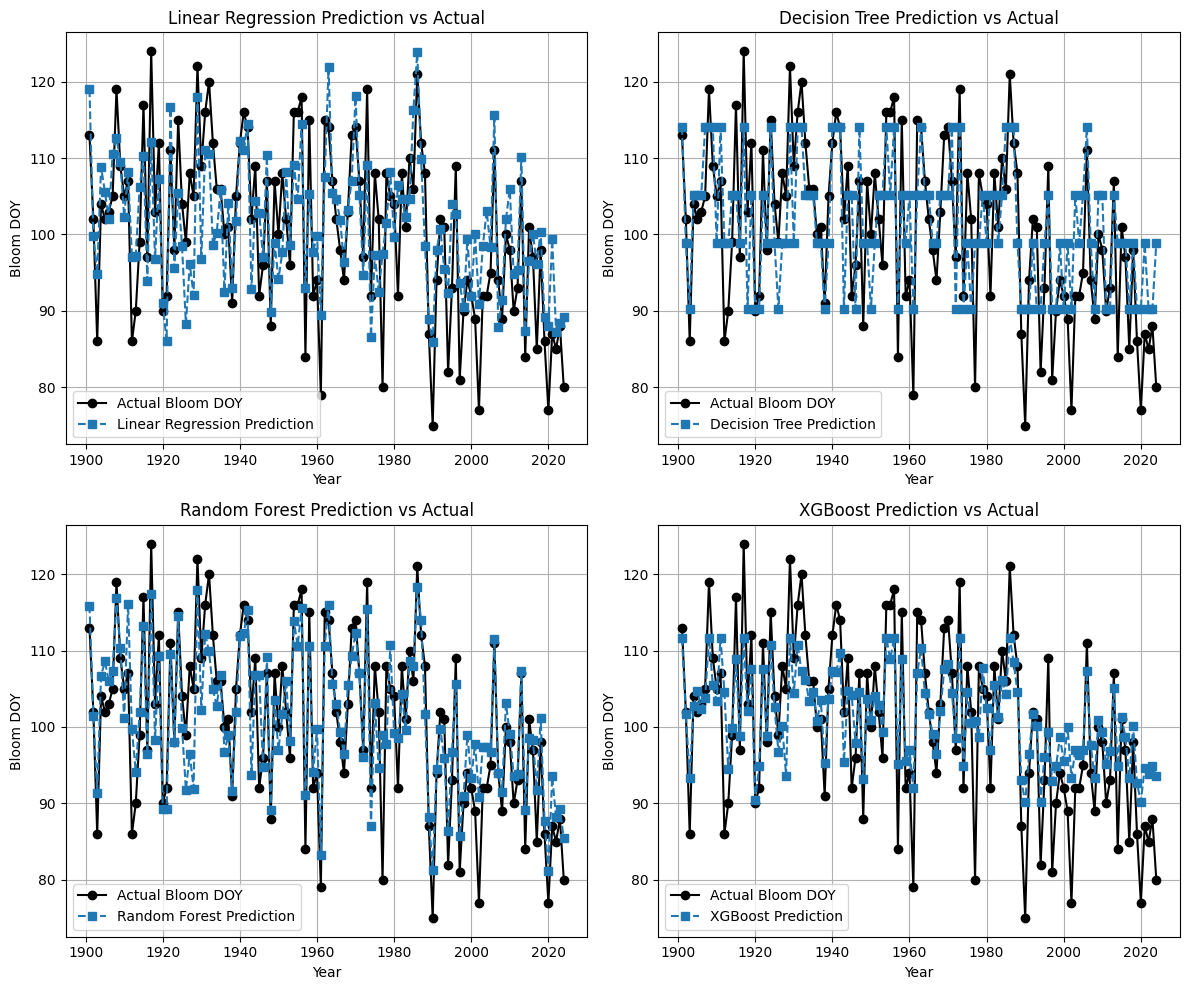

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 确保数据准备好
if "df_final" in globals():
    historical_years = df_final["year"].unique()
    predictions = {}

    for name, model in models.items():
        y_pred_hist = model.predict(X_scaled)  # 预测历史数据
        predictions[name] = y_pred_hist

    # 创建2x2子图
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()  # 将子图展平

    # 遍历每个模型，绘制对应的子图
    for i, (name, y_pred) in enumerate(predictions.items()):
        ax = axes[i]
        ax.plot(historical_years, y, marker="o", linestyle="-", label="Actual Bloom DOY", color="black")
        ax.plot(historical_years, y_pred, marker="s", linestyle="--", label=f"{name} Prediction")

        ax.set_xlabel("Year")
        ax.set_ylabel("Bloom DOY")
        ax.set_title(f"{name} Prediction vs Actual")
        ax.legend()
        ax.grid(True)

    # 调整子图布局
    plt.tight_layout()
    plt.show()
else:
    print("df_final 数据未定义，请提供数据以生成图表。")


In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# import xgboost as xgb
# import lightgbm as lgb
# from catboost import CatBoostRegressor

    # "Decision Tree": {"max_depth": [3, 5, 10, 15, 20]},
    # "Random Forest": {
    #     "n_estimators": [50, 100, 200, 500],
    #     "max_depth": [5, 10, 15, None]
    # },
    # "Gradient Boosting": {
    #     "n_estimators": [50, 100, 200, 500],
    #     "learning_rate": np.logspace(-2, 0, 5),  # 0.01 to 1
    #     "max_depth": [3, 5, 10, 15]
    # },
    # "XGBoost": {
    #     "n_estimators": [50, 100, 200, 500],
    #     "learning_rate": np.logspace(-2, 0, 5),
    #     "max_depth": [3, 5, 10, 15]
    # },
    # "LightGBM": {
    #     "n_estimators": [50, 100, 200, 500],
    #     "learning_rate": np.logspace(-2, 0, 5),
    #     "max_depth": [3, 5, 10, 15]
    # },
    # "CatBoost": {
    #     "iterations": [50, 100, 200, 500],
    #     "learning_rate": np.logspace(-2, 0, 5),
    #     "depth": [3, 5, 10, 15]
    # },
    # "Support Vector Regression": {
    #     "C": np.logspace(-2, 2, 5),  # 0.01 to 100
    #     "gamma": np.logspace(-3, 1, 5)  # 0.001 to 10
    # },
    # }
    # "Generalized Additive Model (GAM)": {
    #     "lam": np.logspace(-3, 3, 10),  # 正则化参数
    #     "n_splines": np.arange(4, 20, 2),       # 样条数
    #     "spline_order": [2, 3]          # 样条阶数
    # },

# if name == "Generalized Additive Model (GAM)":
#         best_mse = float("inf")
#         best_gam = None
#         best_params = {}
#         kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 手动 5 折交叉验证
#         # 确保 y_train 是 NumPy 数组，防止索引不匹配
#         y_train_np = np.array(y_train)

#         for lam in param_grids["Generalized Additive Model (GAM)"]["lam"]:  # 试验 10 个 lam 值
#             for n_splines in param_grids["Generalized Additive Model (GAM)"]["n_splines"]:
#                 for spline_order in param_grids["Generalized Additive Model (GAM)"]["spline_order"]:
#                     fold_mses = []  # 记录每个折的 MSE

#                     # 手动进行 5 折交叉验证
#                     for train_idx, val_idx in kf.split(X_train):
#                         X_tr, X_val = X_train[train_idx], X_train[val_idx]
#                         y_tr, y_val = y_train_np[train_idx], y_train_np[val_idx]

#                         # 训练 GAM 模型
#                         gam = LinearGAM(
#                             s(0, n_splines=n_splines, spline_order=spline_order),
#                             lam=lam
#                         ).fit(X_tr, y_tr)

#                         # 计算验证集 MSE
#                         y_val_pred = gam.predict(X_val)
#                         fold_mses.append(mean_squared_error(y_val, y_val_pred))

#                     # 计算交叉验证 MSE
#                     cv_mse = np.mean(fold_mses)

#                     # 更新最优模型
#                     if cv_mse < best_mse:
#                         best_mse = cv_mse
#                         best_model = gam
#                         best_params = {"lam": lam, "n_splines": n_splines, "spline_order": spline_order}
